In [16]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# Задание 1

На основании датасета для каждого покупателя получите:<br>
•	предпочитаемый метод оплаты;<br>
•	общие траты;<br>
•	количество денег, потраченных на дополнительные услуги и аксессуары


In [110]:
import pandas as pd

In [6]:
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv")

In [86]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Month,Quarter
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,2024-03-01,2024-01-01
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2024-04-01,2024-04-01
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,2023-10-01,2023-10-01
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,2024-08-01,2024-07-01
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,2024-05-01,2024-04-01


In [89]:
preferred_payment = df.groupby('Customer ID')['Payment Method'] \
    .agg(lambda methods: methods.mode().iloc[0] if len(methods.mode()) == 1 else methods.mode().tolist()) \
    .reset_index(name='Предпочитаемый метод оплаты')

comp_df = df[df['Order Status'] == 'Completed']

total_spent = comp_df.groupby('Customer ID')['Total Price'].sum().reset_index(name='Общие траты')

addon_spent = comp_df.groupby('Customer ID')['Add-on Total'].sum().reset_index(name='Доп. траты')

customer_summary = preferred_payment \
    .merge(total_spent, on='Customer ID') \
    .merge(addon_spent, on='Customer ID')

In [90]:
customer_summary

,Customer ID,Предпочитаемый метод оплаты,Общие траты,Доп. траты
0,1000,"[Credit Card, Paypal]",741.09,26.09
1,1002,"[Cash, Credit Card]",5020.60,60.16
2,1003,Cash,41.50,35.56
3,1004,Credit Card,83.00,65.78
4,1005,"[Debit Card, Paypal]",11779.11,75.33
...,...,...,...,...
9461,19990,PayPal,9117.44,113.56
9462,19991,"[Credit Card, PayPal]",12368.06,0.00
9463,19995,Credit Card,5394.56,0.00
9464,19996,"[Bank Transfer, Credit Card, PayPal]",12063.02,198.98


# Задание 2

1. На основании датасета получите доход: <br>
•	по каждому методу доставки, <br>
•	по каждому типу продукта, <br>
•	по дополнительным услугам за каждый месяц, <br>
•	по дополнительным услугам за каждый квартал. <br>
2. Отобразите полученные данные на графике

Доход по каждому методу доставки

In [41]:
delivery_income = df.groupby('Shipping Type')['Total Price'] \
                   .sum() \
                   .reset_index() \
                   .rename(columns={"Total Price": "Income"})

In [42]:
delivery_income

,Shipping Type,Income
0,Expedited,12437526.21
1,Express,8685215.62
2,Overnight,8704828.17
3,Same Day,12432024.82
4,Standard,21343073.55


<Axes: title={'center': 'Доход по типам доставки'}, xlabel='Shipping Type'>

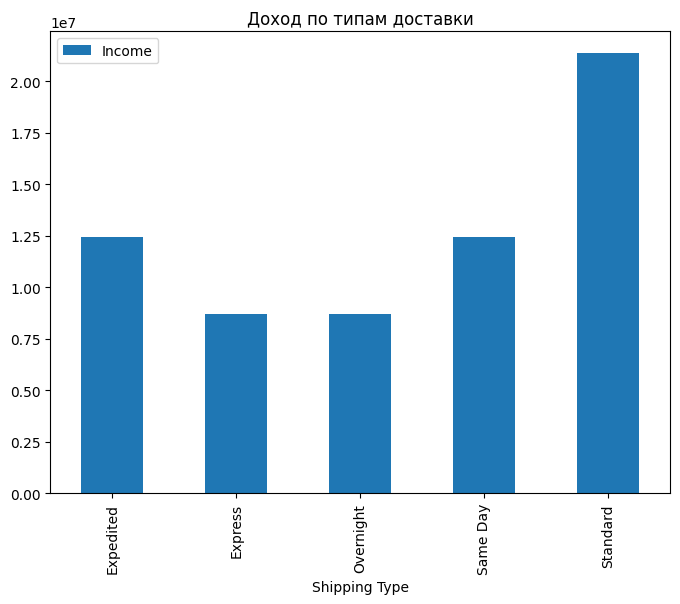

In [48]:
delivery_income.plot(
    x='Shipping Type',
    y='Income',
    kind='bar',
    figsize=(8, 6),
    title='Доход по типам доставки'
)

Доход по каждому типу продукта

In [43]:
product_income = df.groupby('Product Type')['Total Price'] \
                  .sum() \
                  .reset_index() \
                  .rename(columns={"Total Price": "Income"})

In [50]:
product_income

,Product Type,Income
0,Headphones,4041400.24
1,Laptop,12296239.97
2,Smartphone,21516754.69
3,Smartwatch,14036273.06
4,Tablet,11712000.41


<Axes: title={'center': 'Доход по типам продукта'}, xlabel='Product Type'>

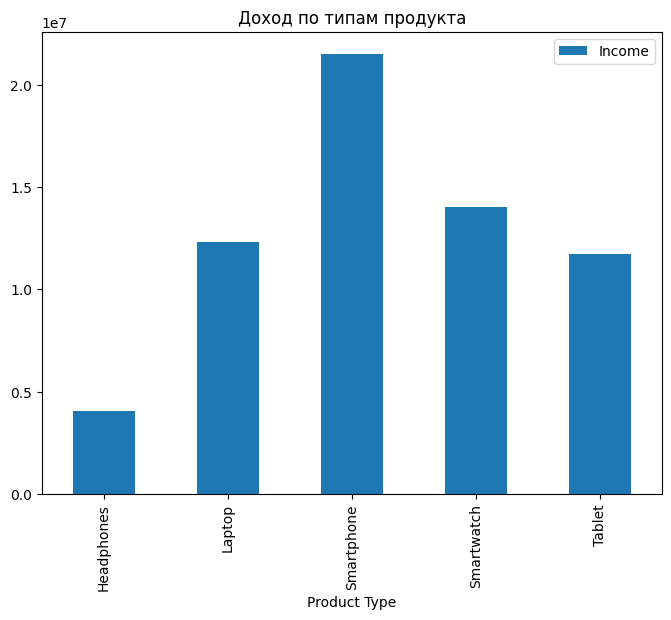

In [54]:
product_income.plot(
    x='Product Type',
    y='Income',
    kind='bar',
    figsize=(8, 6),
    title='Доход по типам продукта'
)

Доход по дополнительным услугам за каждый месяц

In [52]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [62]:
month_income = (df.groupby(df['Purchase Date']
                          .dt.to_period('M')
                          .dt.to_timestamp())['Add-on Total']
                .sum()
                .reset_index(name='Доп. траты')
                .rename(columns={"Purchase Date": "Месяц"}))

In [76]:
month_income

,Месяц,Доп. траты
0,2023-09-01,8012.62
1,2023-10-01,37837.12
2,2023-11-01,34888.81
3,2023-12-01,33509.15
4,2024-01-01,136195.16
5,2024-02-01,120148.92
6,2024-03-01,124954.26
7,2024-04-01,123973.59
8,2024-05-01,132018.51
9,2024-06-01,126689.59


<Axes: title={'center': 'Месячный доход от дополнительных услуг'}, xlabel='Месяц'>

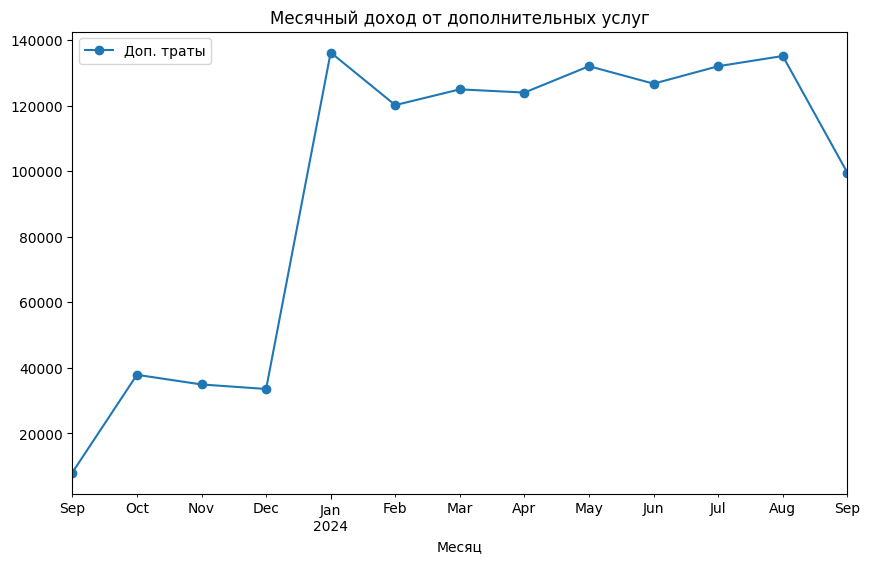

In [92]:
month_income.plot(
    x='Месяц',
    y='Доп. траты',
    kind='line',
    marker='o',
    figsize=(10, 6),
    title='Месячный доход от дополнительных услуг'
)

Доход по дополнительным услугам за каждый квартал

In [73]:
quarter_income = (df.groupby(df['Purchase Date']
                          .dt.to_period('Q')
                          .dt.to_timestamp())['Add-on Total']
                .sum()
                .reset_index(name='Доп. траты')
                .rename(columns={"Purchase Date": "Квартал"}))

In [77]:
quarter_income

,Квартал,Доп. траты
0,2023-07-01,8012.62
1,2023-10-01,106235.08
2,2024-01-01,381298.34
3,2024-04-01,382681.69
4,2024-07-01,366669.23


<Axes: title={'center': 'Квартальный доход от дополнительных услуг'}, xlabel='Квартал'>

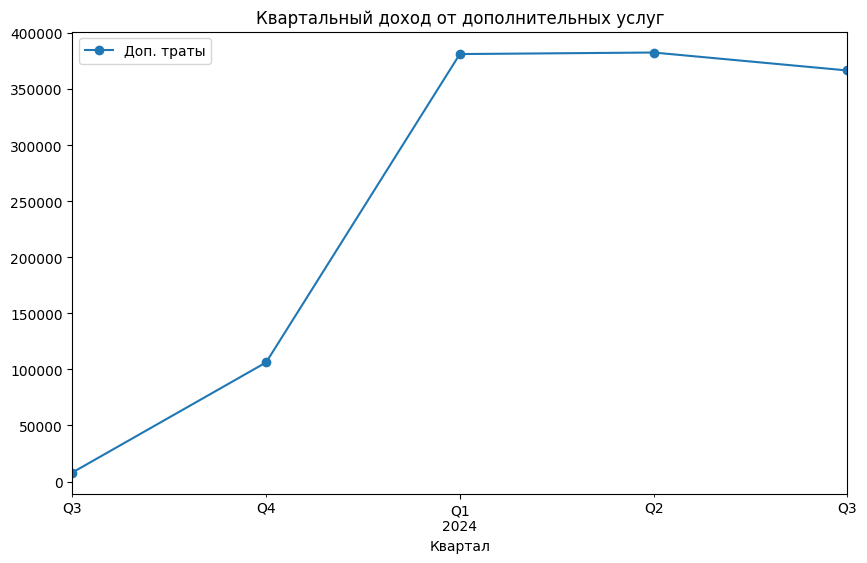

In [102]:
quarter_income.plot(
    x='Квартал',
    y='Доп. траты',
    kind='line',
    marker='o',
    figsize=(10, 6),
    title='Квартальный доход от дополнительных услуг'
)